In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
len(df)

5572

In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [7]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [8]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [9]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((747, 4), (747, 4))

In [10]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


### Exploratory Data Analysis

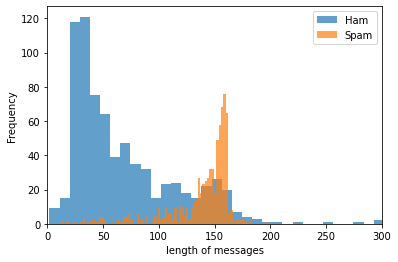

In [11]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7,label='Ham')
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7,label='Spam')
plt.xlabel('length of messages')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,300)
plt.show()

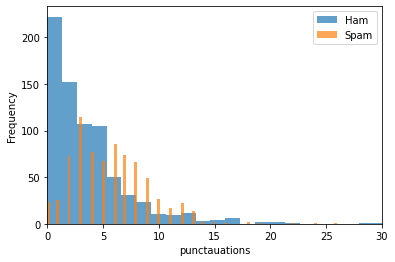

In [12]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7,label='Ham')
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7,label='Spam')
plt.xlabel('punctauations')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,30)
plt.show()

### Data Preparation

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
data.head()

,label,message,length,punct
0,ham,No da. . Vijay going to talk in jaya tv,39,2
1,ham,I dont have any of your file in my bag..i was ...,118,5
2,ham,Yeah we do totes. When u wanna?,31,2
3,ham,I hope your alright babe? I worry that you mig...,158,3
4,ham,Hows the pain dear?y r u smiling?,33,2


In [24]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,stratify=data['label'])

In [25]:
x_train.shape, x_test.shape, y_train.shape

((1045,), (449,), (1045,))

In [17]:
# bag of words creation

In [29]:
vectorizer=TfidfVectorizer()

In [30]:
x_train_tf=vectorizer.fit_transform(x_train)

In [31]:
x_train_tf.shape

(1045, 3724)

In [32]:
print(x_train_tf)

  (0, 123)	0.25860251206920754
  (0, 2460)	0.25860251206920754
  (0, 428)	0.17432138444646314
  (0, 2241)	0.18488628738097548
  (0, 3623)	0.2859003718188694
  (0, 2571)	0.21218414713063738
  (0, 579)	0.2859003718188694
  (0, 1406)	0.18971467172318074
  (0, 1043)	0.141620203327816
  (0, 98)	0.2859003718188694
  (0, 936)	0.09703021354065591
  (0, 979)	0.16074070851672423
  (0, 1885)	0.2859003718188694
  (0, 2569)	0.20161924419612504
  (0, 3333)	0.14520173749296145
  (0, 427)	0.34198260844237627
  (0, 751)	0.18488628738097548
  (0, 834)	0.2859003718188694
  (0, 3485)	0.20926559088901794
  (1, 2426)	0.45323983838569293
  (1, 3293)	0.8913886071181921
  (2, 2400)	0.11079673309904915
  (2, 1074)	0.19806847169432537
  (2, 1403)	0.1541569997753601
  (2, 3656)	0.1396794810305168
  :	:
  (1042, 2356)	0.4568811903063506
  (1042, 3147)	0.43136327551509995
  (1042, 2015)	0.3185990337890747
  (1042, 1689)	0.36222219725646204
  (1042, 1283)	0.24945795553043684
  (1042, 3356)	0.3185990337890747
  (1043

In [41]:
x_train

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742                                    Thinking of u ;) x
477     Sad story of a Man - Last week was my b'day. M...
542     I'm not smoking while people use "wylie smokes...
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312     I'm very happy for you babe ! Woo hoo party on...
268             Later i guess. I needa do mcat study too.
272                 Yo, you at jp and hungry like a mofo?
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: message, Length: 1045, dtype: object

### pipeline and RF

In [33]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [40]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [37]:
y_pred=clf.predict(x_test)

In [38]:
confusion_matrix(y_test,y_pred)

array([[221,   4],
       [ 23, 201]], dtype=int64)

In [42]:
accuracy_score(y_test, y_pred)

0.9398663697104677

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       225
        spam       0.98      0.90      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [59]:
clf.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [60]:
clf.predict(["you have won free tickets to the USA this summer."])

array(['spam'], dtype=object)

In [61]:
clf.predict(["you have won tickets to the USA this summer."])

array(['ham'], dtype=object)

In [62]:
clf_svc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf_svc.fit(x_train, y_train)
y_pred = clf_svc.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[221,   4],
       [ 20, 204]], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       225
        spam       0.98      0.91      0.94       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [64]:
accuracy_score(y_test, y_pred)

0.9465478841870824

In [65]:
clf_svc.predict(["you have got free tickets to the USA this summer."])

array(['spam'], dtype=object)

In [66]:
clf_svc.predict(["you have got tickets to the USA this summer."])

array(['ham'], dtype=object)